# Reference
https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.0/doc/doc_ch/whl.md

In [1]:
from paddleocr import PaddleOCR, draw_ocr
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image 
import os 
import time 

root_train = '../data/train'
root_test = '../data/test'

train_list = os.listdir(root_train)
test_list = os.listdir(root_test)

ocr = PaddleOCR()
f = open('train_list_temp.txt','w')
for img_name in train_list:
    img_path = os.path.join(root_train,img_name)
    result = ocr.ocr(img_path)
    time.sleep(1)
    f.write(img_name+'\t'+str(result)+'\n')
    print(img_path)
f.close()
f = open('test_list_temp.txt','w')
for img_name in test_list:
    img_path = os.path.join(root_test,img_name)
    result = ocr.ocr(img_path)
    f.write(img_name+'\t'+str(result)+'\n')
    time.sleep(1)
    print(img_path)
f.close()

Namespace(cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\halle/.paddleocr/2.0/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=2.0, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\halle/.paddleocr/2.0/det', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:\\Users\\halle/.paddleocr/2.0/rec/ch', use_angle_cls=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/03/17 23:14:52] root INFO: dt_boxes num : 2, elapse : 5.413331985473633
[2021/03/17 23:14:52] root INFO: rec_res num  : 2, e

RuntimeError: ResourceExhaustedError: 

Out of memory error on GPU 0. Cannot allocate 100.461182MB memory on GPU 0, available memory is only 1.163672GB.

Please check whether there is any other process using GPU 0.
1. If yes, please stop them, or start PaddlePaddle on another GPU.
2. If no, please decrease the batch size of your model. 

 (at D:\v2.0.0\paddle\paddle\fluid\memory\allocation\cuda_allocator.cc:69)


In [1]:
from paddleocr import PaddleOCR, draw_ocr
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image 
import os 

root_train = '../data/train'
root_test = '../data/test'
train_listf = '../data/train_list.txt'
test_listf = '../data/test_list.txt'

def get_list(list_root):
    with open(list_root) as f:
        t = f.read()
        t = t.split('\n')
        t = [i for i in t if i]
        t = [i.split() for i in t]
        return t
    
train_list = get_list(train_listf)
train_file = os.path.join(root_train,train_list[0][0])

ocr = PaddleOCR(use_angle_cls = True)
result = ocr.ocr(train_file)
print(result)

Namespace(cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\halle/.paddleocr/2.0/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=2.0, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\halle/.paddleocr/2.0/det', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:\\Users\\halle/.paddleocr/2.0/rec/ch', use_angle_cls=True, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/03/22 10:48:53] root INFO: dt_boxes num : 2, elapse : 11.78899335861206
[2021/03/22 10:48:53] root INFO: rec_res num  : 2, el

In [2]:
image = Image.open(train_file).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/path/to/PaddleOCR/doc/simfang.ttf')
im_show = Image.fromarray(im_show)
# im_show.save('result.jpg')

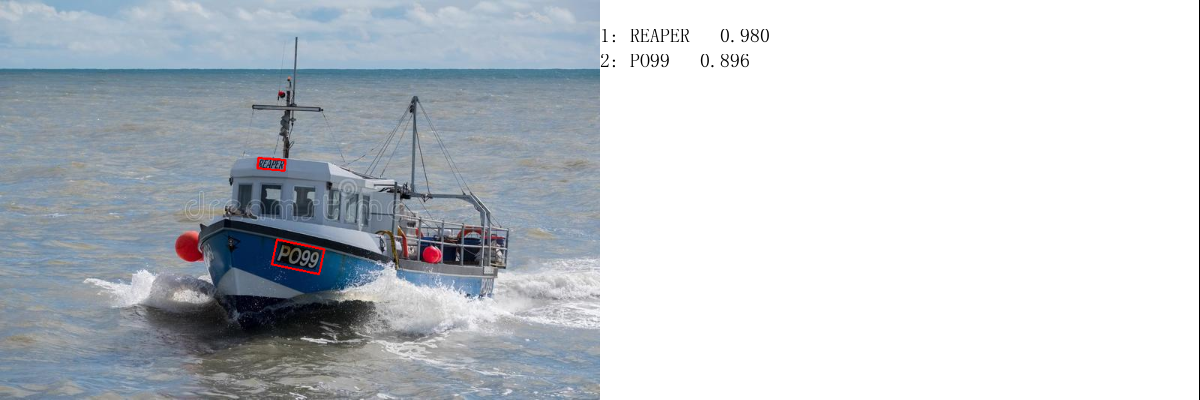

In [3]:
im_show

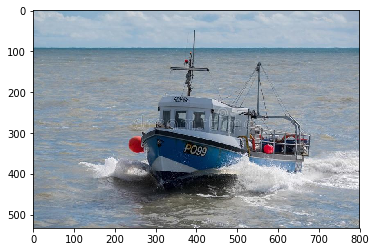

In [2]:
plt.imshow(plt.imread(train_file));plt.show()